In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams["figure.figsize"] = 8, 5

In [55]:
df = pd.read_csv('eda_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Context

In [5]:
# checking the data type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# checking statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [57]:
#split numeric and categorical
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

In [14]:
#number of unique
df_cat.nunique()

Name        92144
Sex             2
Ticket      75331
Cabin       26992
Embarked        3
dtype: int64

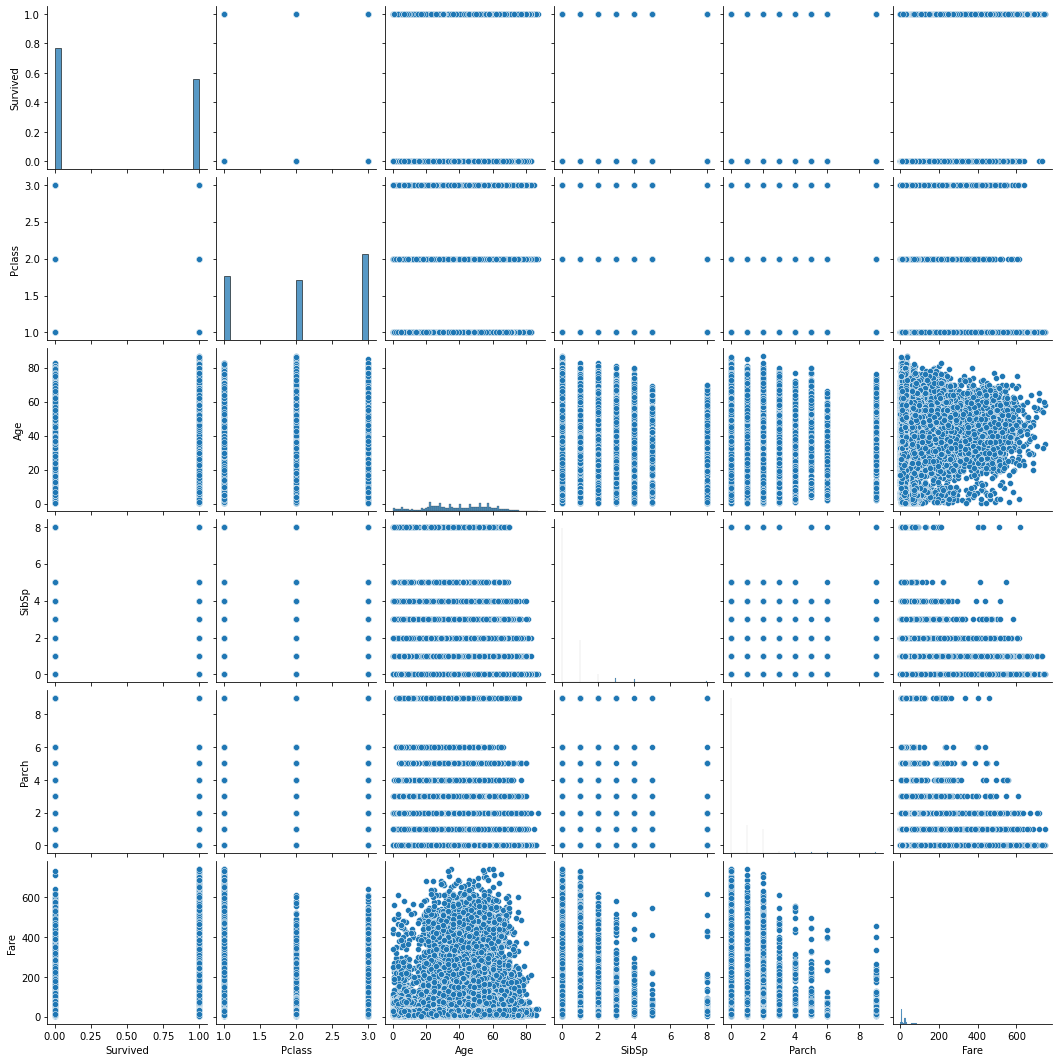

In [18]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df_num.drop(['PassengerId'], axis=1)
);

<AxesSubplot:xlabel='Pclass'>

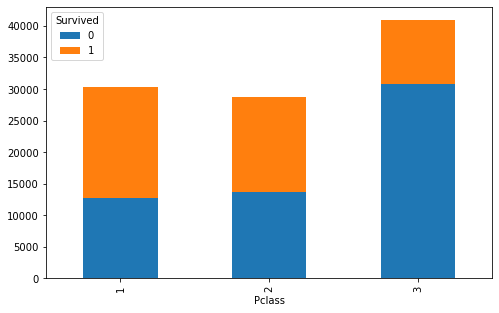

In [58]:
#relations between target and nominative features
df_num.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='SibSp'>

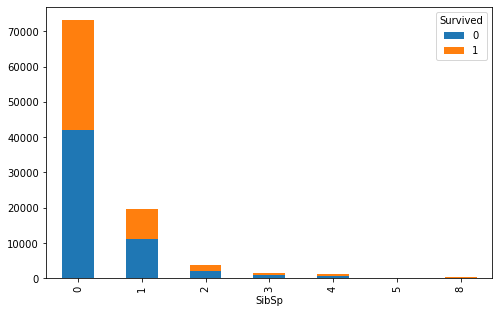

In [59]:
df_num.pivot_table('PassengerId', 'SibSp', 'Survived', 'count').plot(kind='bar', stacked=True)`

<AxesSubplot:xlabel='Parch'>

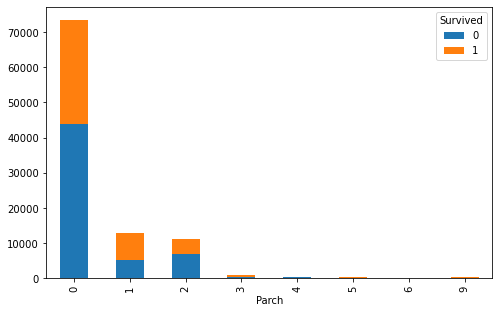

In [60]:
df_num.pivot_table('PassengerId', 'Parch', 'Survived', 'count').plot(kind='bar', stacked=True)

# Data quality assessment

In [34]:
# dropping irrelevant columns
df_cat = df_cat[['Sex', 'Embarked']]
df_num = df_num.drop(['PassengerId'], axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,1,NaN,2,0,27.14,male,S
1,0,3,NaN,0,0,13.35,male,S
2,0,3,0.33,1,2,71.29,male,S
3,0,3,19.00,0,0,13.04,male,S
4,1,3,25.00,0,0,7.76,male,S
...,...,...,...,...,...,...,...,...
99995,1,2,62.00,0,0,14.86,female,C
99996,0,2,66.00,0,0,11.15,male,S
99997,0,3,37.00,0,0,9.95,male,S
99998,0,3,51.00,0,1,30.92,male,S


In [61]:
df = df_num.join(df_cat)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,0,1,1,NaN,2,0,27.14,"Oconnor, Frankie",male,209245,C12239,S
1,1,0,3,NaN,0,0,13.35,"Bryan, Drew",male,27323,NaN,S
2,2,0,3,0.33,1,2,71.29,"Owens, Kenneth",male,CA 457703,NaN,S
3,3,0,3,19.00,0,0,13.04,"Kramer, James",male,A. 10866,NaN,S
4,4,1,3,25.00,0,0,7.76,"Bond, Michael",male,427635,NaN,S


In [40]:
# Na values.
print(df.isnull().sum())

Survived       0
Pclass         0
Age         3292
SibSp          0
Parch          0
Fare         134
Sex            0
Embarked     250
dtype: int64


In [43]:
# dropping the missing values
df = df.dropna()
df.count()

Survived    96332
Pclass      96332
Age         96332
SibSp       96332
Parch       96332
Fare        96332
Sex         96332
Embarked    96332
dtype: int64

# Data exploration

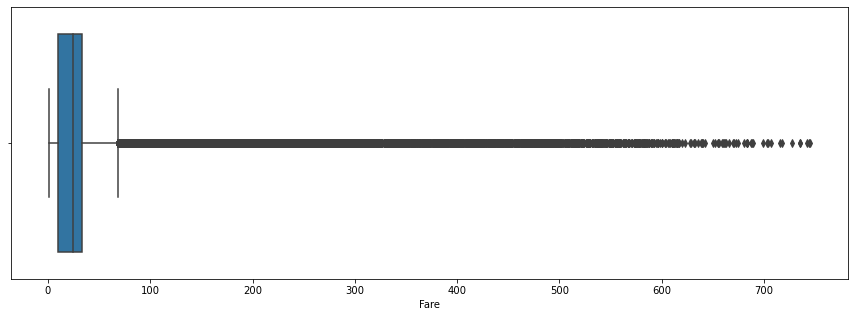

In [47]:
# detecting outliers
plt.figure(figsize=(15, 5))
sns.boxplot(x="Fare", data=df, orient="h");
#too many outliers, we can't delete them

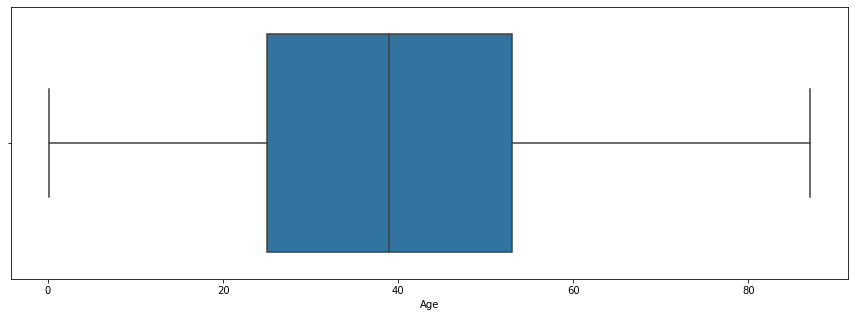

In [48]:
# detecting outliers
plt.figure(figsize=(15, 5))
sns.boxplot(x="Age", data=df, orient="h");

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.289356,0.103888,-0.007398,0.023661,0.187913
Pclass,-0.289356,1.000000,-0.258954,-0.050308,-0.040093,-0.417154
Age,0.103888,-0.258954,1.000000,-0.112351,-0.125503,0.109045
SibSp,-0.007398,-0.050308,-0.112351,1.000000,0.212295,0.058894
Parch,0.023661,-0.040093,-0.125503,0.212295,1.000000,0.060725
Fare,0.187913,-0.417154,0.109045,0.058894,0.060725,1.000000


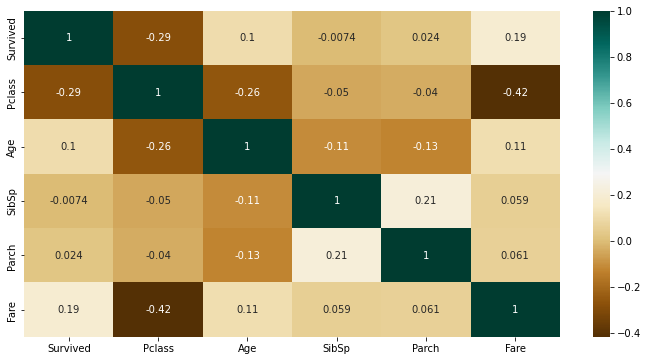

In [51]:
# finding the relations between the variables.
plt.figure(figsize=(12,6))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

<AxesSubplot:xlabel='Sex'>

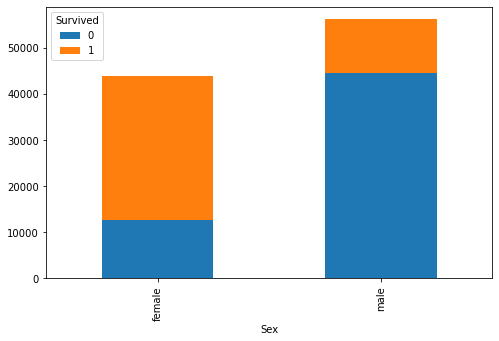

In [62]:
df.pivot_table('Parch', 'Sex', 'Survived', 'count').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Embarked'>

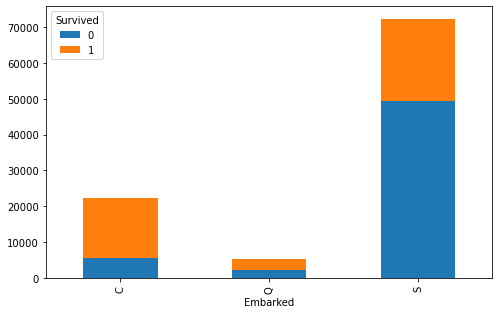

In [65]:
df.pivot_table('Parch', 'Embarked', 'Survived', 'count').plot(kind='bar', stacked=True)

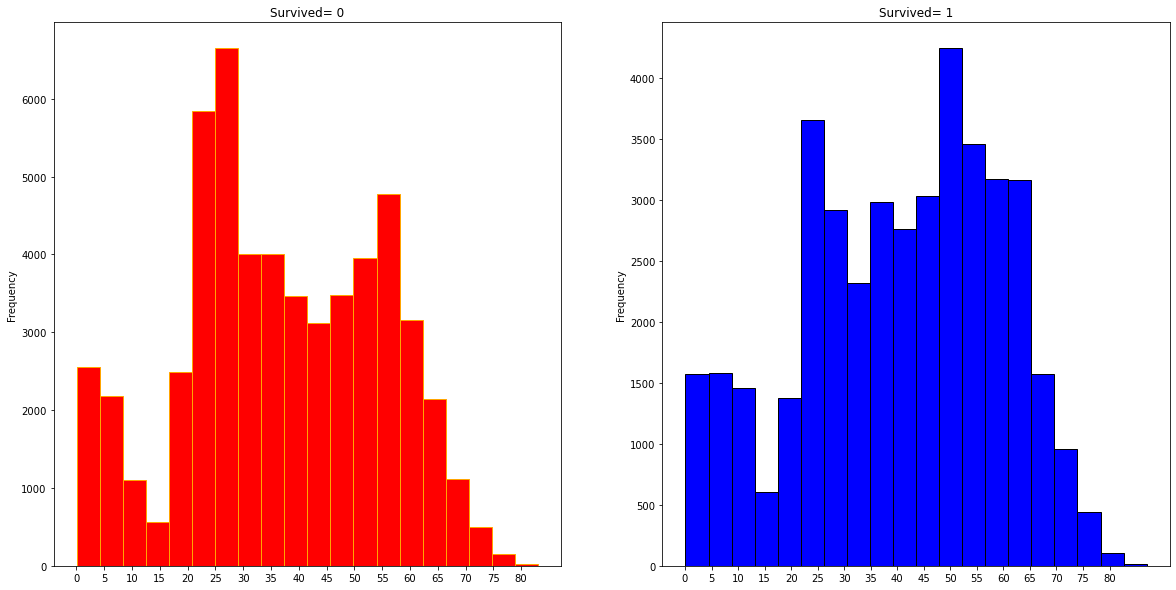

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='orange',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],color='blue',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# Summary

I described features,
draw necessary graphs,
removed missing values,
removed non-important features,
outliers are detected, but decide not to remove them.